In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical # 원핫 인코딩으로 바꿔주는것
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype("float32")/255
y_train = to_categorical(y_train) # 원핫인코딩으로 바꿔주기 위해 to_categorical해줌

In [ ]:
model = Sequential([
                    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(100, activation='relu'),
                    Dense(10, activation="softmax")
                    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8720 - loss: 0.4262
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9757 - loss: 0.0798
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9855 - loss: 0.0492
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9898 - loss: 0.0330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9921 - loss: 0.0249
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9950 - loss: 0.0174
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9961 - loss: 0.0142
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9962 - loss: 0.0119
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9980 - loss: 0.0074
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9986 - loss: 0.0052


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


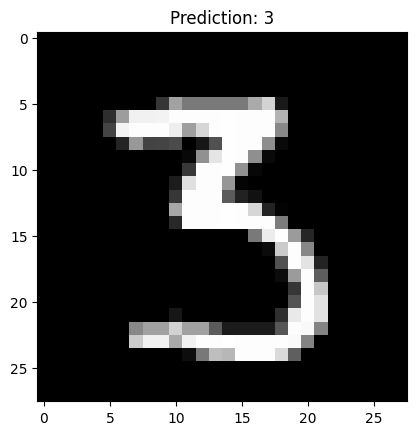

In [ ]:
img = random.choice(X_test)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title(f"Prediction: {np.argmax(model.predict((img.reshape((1, 28, 28, 1)).astype('float32'))/255)[0], axis=-1)}")
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import Callback

from IPython.display import clear_output